# Лабораторна робота №5

## Тема: Алгоритми пошуку
## Мета: Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.

## 1. Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації.

### Асимптотична складність цього алгоритму O(n), оскільки якщо розписати його по константам часу та кількості дій (n) то вийде: T(n)=C1+n(C2+C3)+C4.

## 2. Оцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації.

### Асимптотична складність цього алгоритму пошуку O(log(n)). оскільки якщо розписати його по константам часу та кількості дій (n) то вийде: T(n)=C+C2*log2(n).

## 3. Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_search().

In [ ]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def linear_search_time(sizes, target_position='end'):
    results = []

    for n in sizes:
        arr = list(range(n))
        if target_position == 'start':
            target = arr[0]
        elif target_position == 'middle':
            target = arr[n // 2]
        elif target_position == 'end':
            target = arr[-1]
        else:
            target = -1

        start_time = time.perf_counter()
        linear_search(arr, target)
        end_time = time.perf_counter()

        elapsed_time = end_time - start_time
        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)

## 4. Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_search().

In [ ]:
def bin_search(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1

def binary_search_time(sizes, target_position='end'):
    results = []

    for n in sizes:
        arr = list(range(n))
        
        if target_position == 'start':
            target = arr[0]
        elif target_position == 'middle':
            target = arr[n // 2]
        elif target_position == 'end':
            target = arr[-1]
        else:
            target = -1

        start_time = time.perf_counter()
        bin_search(arr, target)
        end_time = time.perf_counter()

        elapsed_time = end_time - start_time
        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)

## 5. За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.

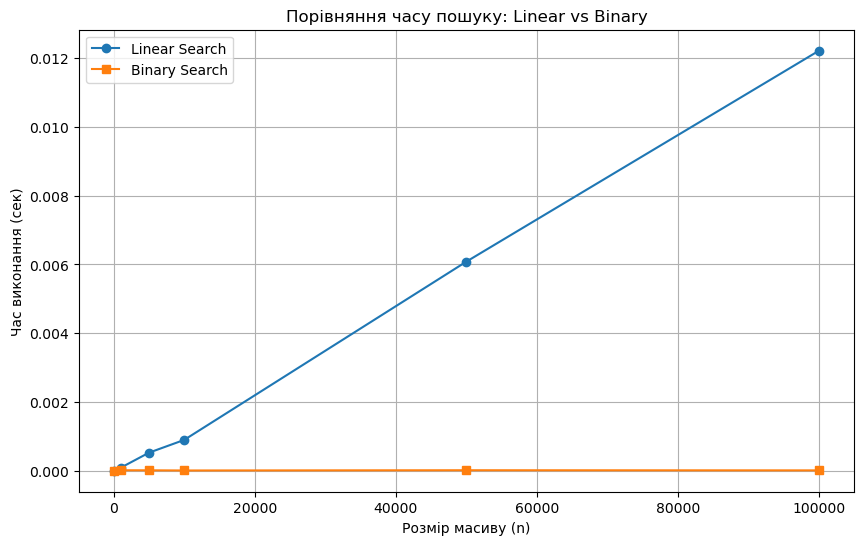

In [11]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import random

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def linear_search_time(sizes, target_position='end'):
    results = []

    for n in sizes:
        arr = list(range(n))
        if target_position == 'start':
            target = arr[0]
        elif target_position == 'middle':
            target = arr[n // 2]
        elif target_position == 'end':
            target = arr[-1]
        else:
            target = -1

        start_time = time.perf_counter()
        linear_search(arr, target)
        end_time = time.perf_counter()

        elapsed_time = end_time - start_time
        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)


def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

def binary_search_time(sizes, target_position='end'):
    data = []
    for n in sizes:
        arr = sorted(random.randint(0, 100000) for _ in range(n))
        x = random.choice(arr)  # елемент, який точно існує
        start_time = time.perf_counter()
        bin_search(arr, x, 0, len(arr) - 1)
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        data.append({'n': n, 'time': elapsed})
    return pd.DataFrame(data)

sizes = [100, 1000, 5000, 10000, 50000, 100000]

df_linear = linear_search_time(sizes, target_position='end')
df_binary = binary_search_time(sizes, target_position='end')

plt.figure(figsize=(10, 6))
plt.plot(df_linear['n'], df_linear['time'], label='Linear Search', marker='o')
plt.plot(df_binary['n'], df_binary['time'], label='Binary Search', marker='s')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (сек)')
plt.title('Порівняння часу пошуку: Linear vs Binary')
plt.legend()
plt.grid(True)
plt.show()

## 6. Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

### В малих обсягах інформації різниця майже не відчувається, але якщо збільшувати об'єм роботи то бінарний пошук починає проявляти себе краще завдяки своїй логарифмічній асимптотиці, оскільки витрачає менше часу на дії.

## 7. Контрольні запитання

### 1. Задача пошуку полягає в тому, щоб знайти конкретний об'єкт або значення у певному списку даних.
### 2. Для розуміння степені еффективності конкретного алгоритму в конкретній задачі потрібно знати: його асимптотику, об'єм даних які він повинен опрацювати, точність обрахунків, та час виконання.
### 3. Алгоритм пошуку, який послідовно перебирає елементи масиву один за одним, поки не знайде шукане значення або не пройде весь масив. Асимптотична складність - О(n).
### 4. Алгоритм пошуку, який розділяє дані на дві половини і перевіряє кожну з них, змешуючи об'єм робот в 2 рази кожну ітерацію до того моменту поки не залишиться потрібний елемент.
### 5.  Переваги - швидкість, краще працює з великими обсягами інформації. Недоліки - треба попередньо відсортувати список, гірше працює з малими обсягами ніж лінійний.
### 6. Пошук у дереві, експоненційний, інтерполяційний, пошук у графі.

### 8. Висновок: НА цій лабораторній роботі ми познайомилися с алгоритмами пошуку та оцінили їх асимптотику.